# Prepare data for training

In [1]:
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,1.21,30.0,1.00,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...,...,...
10211,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10212,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10213,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10214,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000


In [3]:
data_test = pd.read_csv(r'./charge0322_hourly_with_Covid.csv')
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2022-02-01 08:00:00,20.445542,1,8,NaN,False,0.930,15.0,0.25,13.311142,3.249800,0.000000
1,2022-02-01 09:00:00,13.989892,1,9,NaN,False,0.930,15.0,0.25,20.445542,13.311142,3.249800
2,2022-02-01 10:00:00,6.558958,1,10,NaN,False,0.930,15.0,0.25,13.989892,20.445542,13.311142
3,2022-02-01 11:00:00,11.839467,1,11,NaN,False,0.930,15.0,0.25,6.558958,13.989892,20.445542
4,2022-02-01 12:00:00,7.112458,1,12,NaN,False,0.930,15.0,0.25,11.839467,6.558958,13.989892
...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000925
661,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
662,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
663,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000


In [4]:
sequence = data['Energy_kWh'].values
sequence.shape

(10216,)

In [5]:
test_sequence = data_test['Energy_kWh'].values
test_sequence.shape

(665,)

In [6]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1))
#train_data_normalized = scaler.fit_transform(sequence .reshape(-1, 1))

In [7]:
#train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized = torch.FloatTensor(sequence).view(-1)

In [159]:
# 1.5 day = 36 hours
train_window = 168
# predict next 5 hours
out_sz = 5

In [160]:
def create_inout_sequences(input_data, tw, out_sz):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw-out_sz):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+out_sz]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [161]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window, out_sz)
len(train_inout_seq)

10043

In [162]:
train_inout_seq[-5:]

[(tensor([5.3083e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9653e+00, 2.3759e+01, 3.2956e+01,
          2.4341e+01, 7.0403e+00, 8.2688e+00, 1.0609e+01, 4.7663e+00, 9.4417e-03,
          2.3750e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1222e+00,
          3.9524e+00, 2.7345e+00, 1.4694e+00, 7.3229e+00, 9.7542e+00, 3.0312e+00,
          2.9821e-01, 3.1358e-01, 2.8892e-01, 3.5083e-02, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 5.8031e+00, 2.4300e+01, 3.5307e+01,
          2.6887e+01, 2.0926e+01, 1.0768e+01, 1.3449e+00, 2.8088e+00, 8.5193e-01,
          0.0000

In [163]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    def forward(self, input_seq):            
        batch_size, seq_len = input_seq.size()
        hidden_cell = (torch.zeros(1,batch_size,self.hidden_layer_size).to(self.device),
                       torch.zeros(1,batch_size,self.hidden_layer_size).to(self.device))
        #global save
        #save = input_seq
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1).swapaxes(1,2), hidden_cell)
        predictions = self.linear(lstm_out.reshape([batch_size*seq_len,lstm_out.shape[-1]]))
        #save = predictions
        predictions = predictions.view(seq_len, batch_size, -1)
        hidden_cell = [_.detach() for _ in hidden_cell]
        return predictions[-2]

In [164]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score

In [165]:
x_list = [x[0] for x in train_inout_seq]
y_list = [x[1] for x in train_inout_seq]

In [166]:
torch.stack(x_list).shape

torch.Size([10043, 168])

In [167]:
import torch.utils.data as utils

dataset = utils.TensorDataset(torch.stack(x_list), torch.stack(y_list))
dataset

In [168]:
dataset.tensors[0].shape

torch.Size([10043, 168])

In [169]:
len(dataset)

10043

In [179]:
from torch.utils.data import random_split

train_set, val_set = torch.utils.data.random_split(dataset, [round(len(dataset)*0.8), round(len(dataset)*0.2)])

In [170]:
# LSTM model init hidden state batch by batch. Therefore, data must not be shuffled

# Created using indices from 0 to train_size.
#train_set = torch.utils.data.Subset(dataset, range(int(len(dataset)*0.8)))

# Created using indices from train_size to train_size + test_size.
#val_set = torch.utils.data.Subset(dataset, range(int(len(dataset)*0.8), len(dataset)))

In [180]:
train_set

In [181]:
train_dls = utils.DataLoader(train_set, batch_size=1)
val_dls = utils.DataLoader(val_set, batch_size=1)

dls = DataLoaders(train_dls, val_dls)

In [182]:
model = LSTM(output_size=out_sz)
learn = Learner(dls, model, loss_func=multiPointLoss)
#learn = Learner(dls, model, loss_func=F.mse_loss)

In [184]:
learn.fine_tune(25, 2e-2)

epoch,train_loss,valid_loss,time
0,1.391775,1.068587,02:18


epoch,train_loss,valid_loss,time
0,1.373614,1.060222,02:17
1,1.384529,1.055203,02:18
2,1.389705,1.054905,02:17
3,1.388883,1.061195,02:17
4,1.401116,1.058074,02:17
5,1.382836,1.069080,02:16
6,1.394148,1.063351,02:16
7,1.392392,1.064918,02:16
8,1.396067,1.063670,02:16
9,1.403556,1.062367,02:15


In [185]:
preds,targs = learn.get_preds(dl=dls[1])

In [186]:
preds.shape

torch.Size([2009, 5])

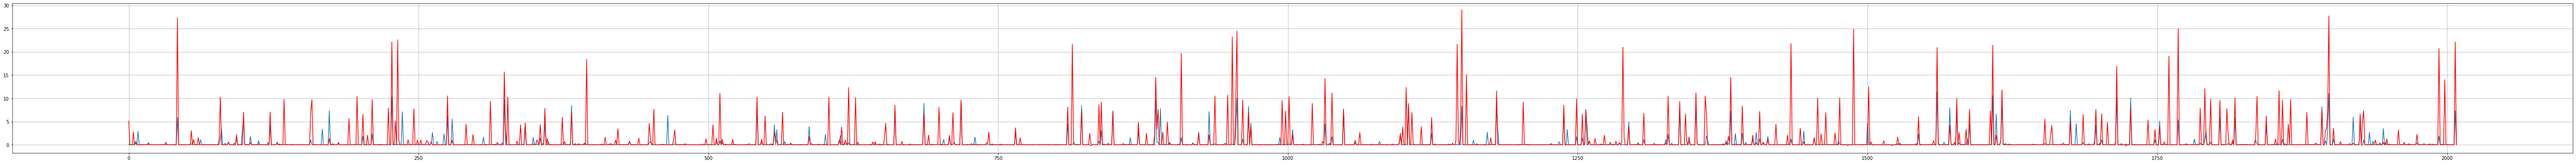

In [187]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,0])
plt.plot(range(preds.shape[0]), targs[:,0], 'r')
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [188]:
torch.save(learn, "models/LSTM_multipoint.pth")

# Test set

In [189]:
test_data = torch.FloatTensor(test_sequence).view(-1)

In [191]:
test_inout_seq = create_inout_sequences(test_data, train_window, out_sz)
len(test_inout_seq)

492

In [192]:
test_x_list = [x[0] for x in test_inout_seq]
test_y_list = [x[1] for x in test_inout_seq]

In [193]:
test_dataset = utils.TensorDataset(torch.stack(test_x_list), torch.stack(test_y_list))
test_dataset

In [194]:
test_dls = utils.DataLoader(test_dataset, batch_size=1)
#val_dls = utils.DataLoader(val_set, batch_size=1)

#dls = DataLoaders(train_dls, val_dls)

In [195]:
preds,targs = learn.get_preds(dl=test_dls)

In [196]:
preds.shape

torch.Size([492, 5])

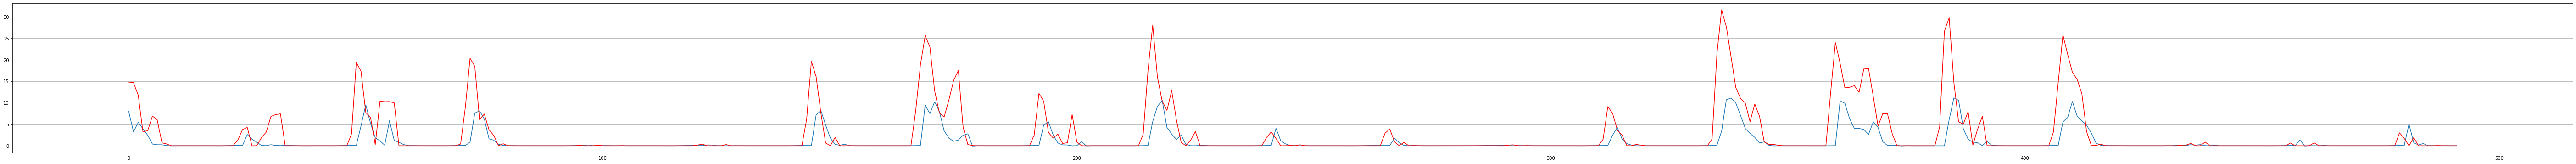

In [197]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,0])
plt.plot(range(preds.shape[0]), targs[:,0], 'r')
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()